In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 - Importação das bibliotecas

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import collections
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# 2 - Importação dos dados

In [3]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Machine Learning e Data Science com Python de A a Z/Estudo geral/census.csv'
base = pd.read_csv(PATH)
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# 3 - Dicionario de dados


Detalhes:
- age: idade (Variável numérica discreta)
 
- workclass: tipo de emprego (Variável categórica nominal)
 
- final-weight: característica demográfica/socioeconômica (Variável numérica discreta)
 
- education: tipo de educação (Variável categórica ordinal)
 
- education-num: quantidade de anos que a pessoa está estudando (variável numérica discreta)
 
- marital-status: estado civil (Variável categórica ordinal)
 
- occupation: tipo de trabalho (Variável categórica nominal)
 
- relationship: relacionamento (Variável categórica nominal)
 
- race: raça (Variável categórica nominal)
 
- sex: sexo (Variavel categórica nominal)
 
- capital-gain: ganho de capital (Variável numérica contínua)
 
- capital-loss: perda de capital (Variável numérica contínua)
 
- hour-per-week: horas de trabalho por semana (Variável numérica discreta)
 
- native-country: nacionalidade (Variável categórica nominal)
 
- income: renda (Variável categórica nominal)


# 4 - Pré-processamento 
 

## 4.1 - Separando a base em previsões e classes

In [5]:
previsores = base.iloc[:, 0:14].values
previsores

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [6]:
classe = base.iloc[:, 14].values
classe

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## 4.2 - Transformação das variáveis categóricas

In [7]:
labelEncoder_previsores = LabelEncoder()

In [8]:
previsores[:, 1] = labelEncoder_previsores.fit_transform(previsores[:, 1])
previsores[:, 3] = labelEncoder_previsores.fit_transform(previsores[:, 3])
previsores[:, 5] = labelEncoder_previsores.fit_transform(previsores[:, 5])
previsores[:, 6] = labelEncoder_previsores.fit_transform(previsores[:, 6])
previsores[:, 7] = labelEncoder_previsores.fit_transform(previsores[:, 7])
previsores[:, 8] = labelEncoder_previsores.fit_transform(previsores[:, 8])
previsores[:, 9] = labelEncoder_previsores.fit_transform(previsores[:, 9])
previsores[:, 13] = labelEncoder_previsores.fit_transform(previsores[:, 13])
previsores

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [9]:
onehotencoder = OneHotEncoder()

In [10]:
previsores = onehotencoder.fit_transform(previsores[:, [1, 3, 5, 6, 7, 8, 9, 13]]).toarray()

In [11]:
previsores

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [12]:
previsores.shape

(32561, 102)

In [13]:
labelEncoder_classe = LabelEncoder()

In [14]:
classe = labelEncoder_classe.fit_transform(classe)
classe

array([0, 0, 0, ..., 0, 0, 1])

## 4.3 - Escalonamento dos valores

In [15]:
scaler = StandardScaler()

In [16]:
previsores = scaler.fit_transform(previsores)
previsores

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  0.34095391,
        -0.04540836, -0.02217266],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  0.34095391,
        -0.04540836, -0.02217266]])

# 5 - Divisão da base em treino e teste 

## 5.1 - Criando os previsores e as classes

In [17]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [18]:
previsores_treinamento.shape, previsores_teste.shape, classe_treinamento.shape, classe_teste.shape

((27676, 102), (4885, 102), (27676,), (4885,))

## 5.2 - Verificando a linha de base (Baseline)

In [19]:
collections.Counter(classe_teste)

Counter({0: 3693, 1: 1192})

- Verificamos que para o modelo ser eficiente, a acurácia base terá um valor de **75,59%**

# 6 - Criação do modelo

## 6.1 - Utilizando o modelo de Regressão Logística

### 6.1.1 - Criando as predições

In [20]:
modelo_logistica_regressao = LogisticRegression(random_state=1)
modelo_logistica_regressao.fit(previsores_treinamento, classe_treinamento)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
predicoes = modelo_logistica_regressao.predict(previsores_teste)

### 6.1.2 - Resultado da predição

In [22]:
print(classification_report(classe_teste, predicoes))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3693
           1       0.67      0.54      0.60      1192

    accuracy                           0.82      4885
   macro avg       0.77      0.73      0.74      4885
weighted avg       0.81      0.82      0.82      4885



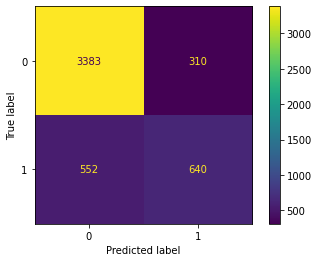

In [23]:
disp = plot_confusion_matrix(modelo_logistica_regressao, previsores_teste, classe_teste, values_format="d")
print(disp)
plt.show()

## 6.2 - Utilizando o modelo de Neive Bayes

### 6.2.1 - Criando as predições

In [24]:
classificador = GaussianNB()
classificador.fit(previsores_treinamento, classe_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
previsores = classificador.predict(previsores_teste)

### 6.2.2 - Resultado da predição

In [26]:
print(classification_report(classe_teste, previsores))

              precision    recall  f1-score   support

           0       0.96      0.29      0.44      3693
           1       0.30      0.97      0.46      1192

    accuracy                           0.45      4885
   macro avg       0.63      0.63      0.45      4885
weighted avg       0.80      0.45      0.45      4885



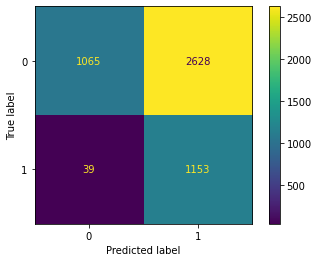

In [27]:
disp = plot_confusion_matrix(classificador, previsores_teste, classe_teste, values_format="d")
print(disp)
plt.show()

* Obs.: Os dados ficam mais ajustados quando não é utilizado em conjunto o Escalonamento das variaveis e o OneHotEncoder.

## 6.3 Utilizando Árvore de Decisão

### 6.3.1 - Criando as predições

In [28]:
classificador_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [29]:
classificador_DT.fit(previsores_treinamento, classe_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [30]:
previsores_DT = classificador_DT.predict(previsores_teste)

### 6.3.2 - Resultado da predição

In [31]:
print(classification_report(classe_teste, previsores_DT))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      3693
           1       0.63      0.53      0.58      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.71      0.73      4885
weighted avg       0.80      0.81      0.80      4885



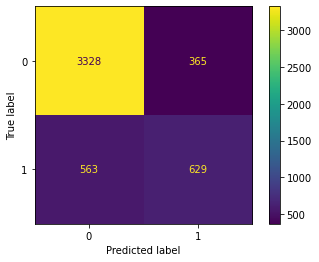

In [32]:
disp = plot_confusion_matrix(classificador_DT, previsores_teste, classe_teste, values_format="d")
print(disp)
plt.show()

## 6.4 - Utilizando Árvores Randomicas

### 6.4.1 - Criando as predições

In [33]:
classificador_RF = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=0)

In [34]:
classificador_RF.fit(previsores_treinamento, classe_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
previsores_RF = classificador_RF.predict(previsores_teste)

### 6.4.2 - Resultado da predição

In [36]:
print(classification_report(classe_teste, previsores_RF))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      3693
           1       0.64      0.54      0.59      1192

    accuracy                           0.81      4885
   macro avg       0.75      0.72      0.73      4885
weighted avg       0.81      0.81      0.81      4885



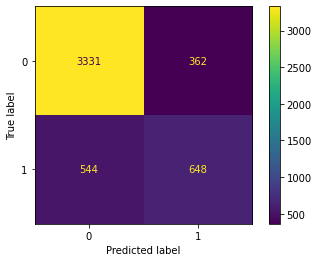

In [37]:
disp = plot_confusion_matrix(classificador_RF, previsores_teste, classe_teste, values_format="d")
print(disp)
plt.show()

## 6.5 - Utilizando KNN

### 6.5.1 - Criando a predição

In [38]:
classificador_KNN = KNeighborsClassifier()

In [39]:
classificador_KNN.fit(previsores_treinamento, classe_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
previsores_KNN = classificador_KNN.predict(previsores_teste)

### 6.5.2 - Resultado da predição

In [41]:
print(classification_report(classe_teste, previsores_KNN))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      3693
           1       0.61      0.56      0.58      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.72      0.73      4885
weighted avg       0.80      0.81      0.80      4885



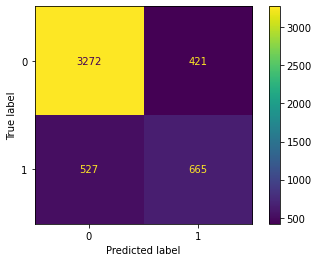

In [42]:
disp = plot_confusion_matrix(classificador_KNN, previsores_teste, classe_teste, values_format="d")
print(disp)
plt.show()